In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
sns.set(style='whitegrid')
dataset=pd.read_csv("50_Startups.csv")
print("dataset shape:",dataset.shape)
dataset.head()

dataset shape: (50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Separate features and target
X = dataset.iloc[:, :-1].values  # all columns except last (Profit)
y = dataset.iloc[:, -1].values   # last column (Profit)
 
print('\nFeature preview (first 5 rows):')
print(X[:5])
 



Feature preview (first 5 rows):
[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]


In [5]:
# Encode categorical 'State' column (index 3)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X_encoded = ct.fit_transform(X)


In [6]:
# Convert to numpy array and inspect
X = np.array(X_encoded)
print('\nAfter OneHotEncoding, feature shape:', X.shape)
print('\nFirst 5 rows after encoding:')
print(X[:5])


After OneHotEncoding, feature shape: (50, 6)

First 5 rows after encoding:
[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


In [7]:
# 2) Fit Model - Code
# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])
 
# Train the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))

Training samples: 40
Test samples: 10
Intercept: 42467.52924854249
Number of coefficients: 6


In [8]:
# 3) Predict - Code
# Predicting Test set results
y_pred = regressor.predict(X_test)
 
# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Profit': y_test,
    'Predicted Profit': np.round(y_pred,2)
})
display(comparison.reset_index(drop=True))

,Actual Profit,Predicted Profit
0,103282.38,103015.20
1,144259.40,132582.28
2,146121.95,132447.74
3,77798.83,71976.10
4,191050.39,178537.48
5,105008.31,116161.24
6,81229.06,67851.69
7,97483.56,98791.73
8,110352.25,113969.44
9,166187.94,167921.07


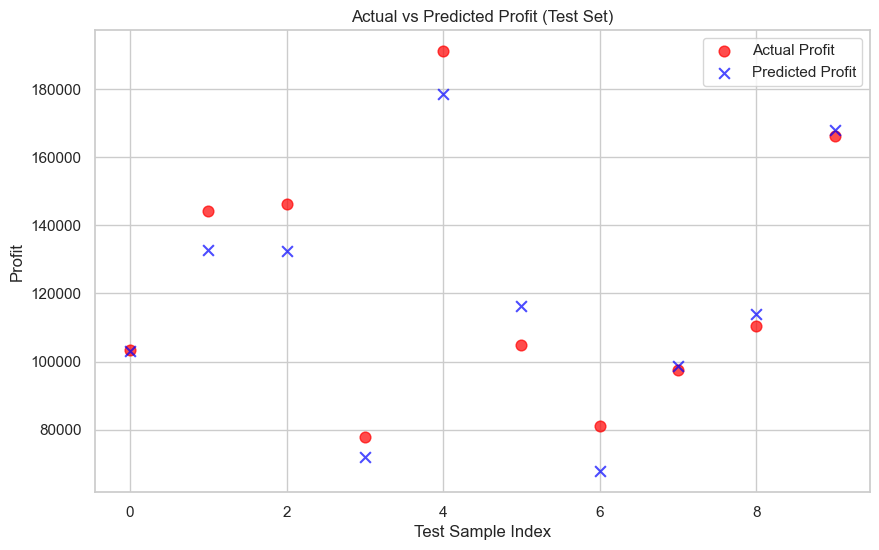

In [11]:
import matplotlib.pyplot as plt
# 4) Visualization - Code
# Visualization: Actual vs Predicted profits (scatter)
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Profit (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.show()

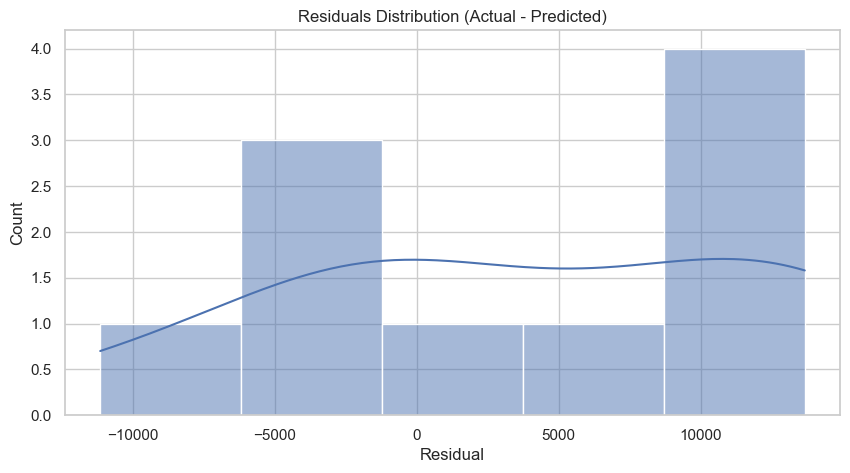

In [12]:
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()

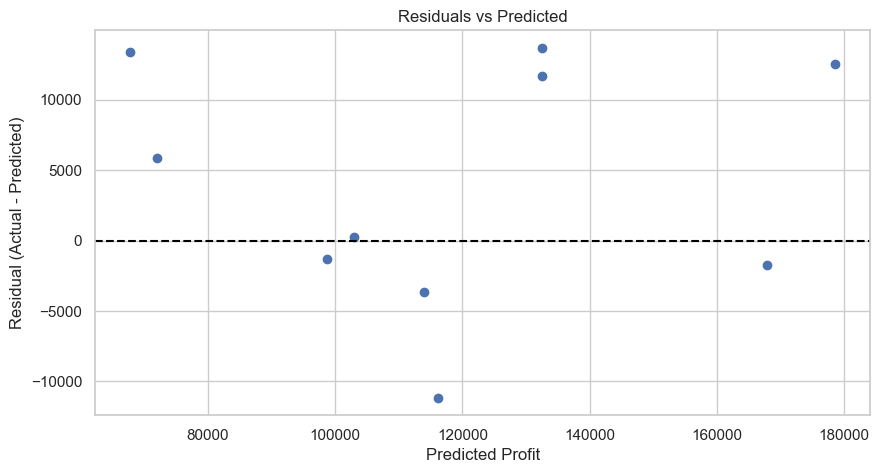

In [13]:
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()

In [14]:
# Evaluation metrics & sample prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
mse = mean_squared_error(y_test, y_pred)
 
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')
 
# Sample prediction: build raw sample and encode using ct (same transformer used earlier)
raw_sample = np.array([[160000, 130000, 300000, 'California']])
encoded_sample = ct.transform(raw_sample)
encoded_sample = np.array(encoded_sample, dtype=float)
pred_sample = regressor.predict(encoded_sample)
print('\nSample startup predicted profit:', float(pred_sample[0]))
 
 

Mean Squared Error (MSE): 83502864.03
R^2 Score: 0.9347

Sample startup predicted profit: 181566.92389385228


### multiple regression using advertising dataset

In [ ]:

Business Scenario
A consumer goods company promotes its product using multiple advertising channels:
Television (TV)
Radio
Newspaper
The company wants to understand:
“How do different advertising channels together influence product sales?”
They also want to predict future sales based on planned advertising budgets.
You are appointed as a Data Analyst to analyze the data and build a predictive model.
📝 Tasks
Load the dataset and examine the available columns.
Use TV, Radio, and Newspaper advertising spends as input features.
Use Sales as the target variable.
Build a model that learns the relationship between advertising spends and sales.
Train the model using historical data.
Predict sales for unseen data points.
Predict sales when the advertising budget is:
TV = 150
Radio = 20
Newspaper = 30
Evaluate the model’s prediction error.
Interpret the coefficients of the model:
Which advertising medium has the strongest impact on sales?
Which medium has the least impact?
Visualize:
Actual sales vs predicted sales
Based on your analysis, suggest:
One business recommendation to improve sales
One technical improvement to improve prediction accuracy
 
Advertising Dataset | Kaggle
Kaggle is the world’s largest data science community with powerful tools and resources to help you achieve your data science goals.
 

In [16]:
df=pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [17]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [19]:
X=df[['TV', 'Radio', 'Newspaper']]
y=df[['Sales']]

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
#pedicting data for sales
y_pred=model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae)
print(mse)
print(r2)

1.274826210954934
2.907756910271091
0.9059011844150826


In [29]:
import numpy as np

new_data = np.array([[150, 20, 30]])
predicted_sales = model.predict(new_data)

print("Predicted Sales:", predicted_sales[0])

Predicted Sales: [15.03952368]


c:\Users\yanal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


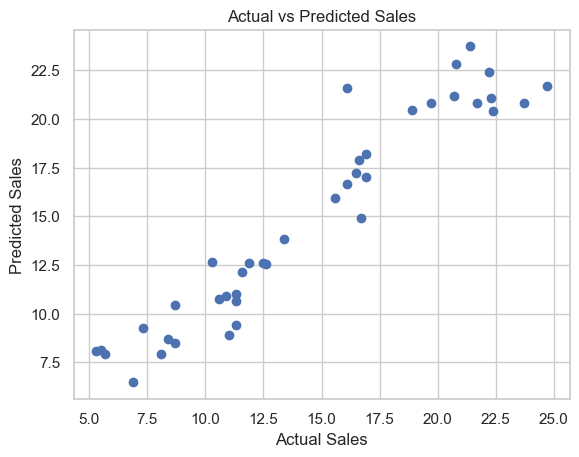

In [34]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [ ]:
🧩 Assignment Tasks
✅ Task 1 — Business Understanding
Identify:
The target variable (company’s financial concern)
The input variables related to customer risk
Explain how your regression model helps the company control rising costs, not just predict them.
✅ Task 2 — Data Inspection
Explore the dataset and:
Separate numeric and categorical columns
Identify columns that are not directly usable in regression
Report any data quality issues you observe.
✅ Task 3 — Data Cleaning & Encoding
Convert categorical variables into numeric form.
Decide how to handle:
Region information
Binary attributes like lifestyle indicators
Justify each transformation from a business and modeling perspective.
✅ Task 4 — Feature Scaling & Comparability
Observe differences in value ranges among numeric features.
Explain why scaling is important when comparing regression coefficients.
Prepare the data so the effect of each variable can be fairly interpreted.
⚠️ Task 5 — The Hidden Trap (Multicollinearity)
Analyze relationships between independent variables.
Identify any highly correlated features (example: age, BMI, and lifestyle habits).
Explain:
Why multicollinearity is a problem in Multiple Linear Regression
How it can confuse business decision-making
Take appropriate steps to fix the issue.
 

## mul reg using insurance dataset 

In [38]:
import pandas as pd
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric:", numeric_cols)
print("Categorical:", categorical_cols)

Numeric: Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Categorical: Index(['sex', 'smoker', 'region'], dtype='object')


In [40]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [41]:
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

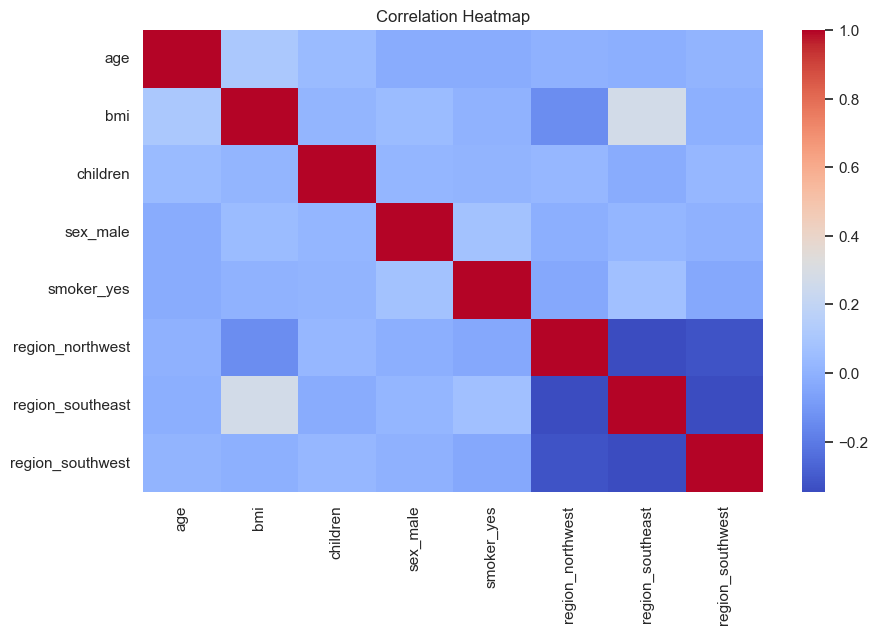

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = pd.DataFrame(X_scaled, columns=X.columns).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [43]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)

Ridge()